Import Required Packages

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


Import the CSV Data as Pandas DataFrame

In [94]:
df = pd.read_csv('data\StudentsPerformance.csv')

In [95]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [96]:
df.shape

(1000, 8)

Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [97]:
#Check Missing values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [98]:
#Check Duplicates
df.duplicated().sum()

0

In [99]:
#check for the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [100]:
#check the number of unique values of each column
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [101]:
#describe the data
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [102]:
#exploring the data
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [103]:
#defining the unique values in each categorical columns
for i in df:
    if i in ['math score','reading score','writing score']:
        continue
    print("Categories in '{0}' variable:     ".format(i),end=" " )
    print(df[i].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:      ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable:      ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [104]:
#defining numerical and categorical features
numerical_features=[]
categorical_features=[]
for i in df:
    if df[i].dtype !='O':
        numerical_features.append(str(i))
    else:
        categorical_features.append(str(i))

print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [105]:
#adding columns for "total_score" and "Average".

df["total_score"]=df["math score"]+df["reading score"]+df["writing score"]
df["Average"] = df["total_score"]/3 
df.head() 


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [106]:
reading_full = df[df['reading score'] == 100]["Average"].count()
writing_full = df[df['writing score'] == 100]['Average'].count()
math_full = df[df['math score'] == 100]['Average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [107]:
reading_less_20 = df[df['reading score'] <= 20]['Average'].count()
writing_less_20 = df[df['writing score'] <= 20]['Average'].count()
math_less_20 = df[df['math score'] <= 20]['Average'].count()

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


## Exploring the DATA (Visualization)


<Axes: >

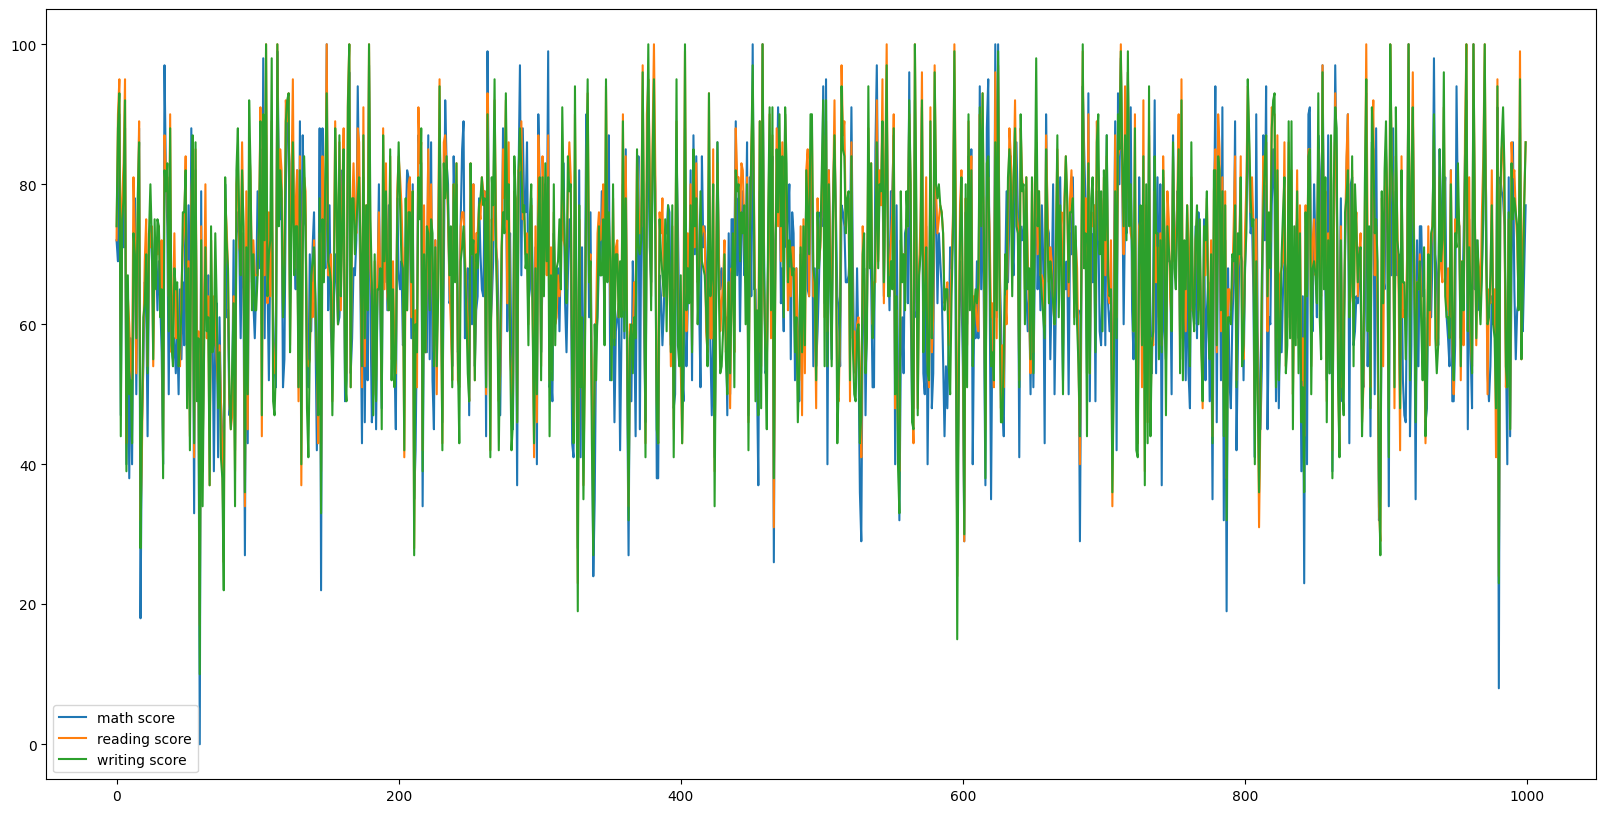

In [108]:
df[['math score','reading score','writing score']].plot(figsize = (20,10))

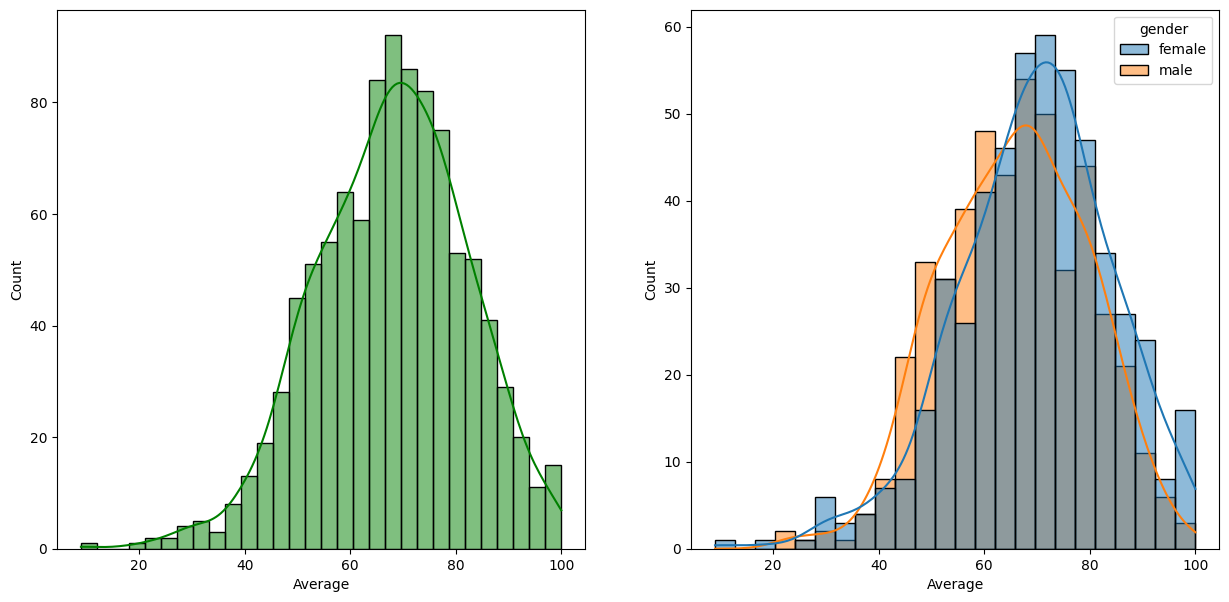

In [109]:
 fig,axs = plt.subplots(1,2,figsize=(15,7))
 plt.subplot(121)
 sns.histplot(data=df, x="Average", bins=30,kde=True,color='g')
 plt.subplot(122)
 sns.histplot(data=df, x="Average", kde=True, hue="gender")
 plt.show()

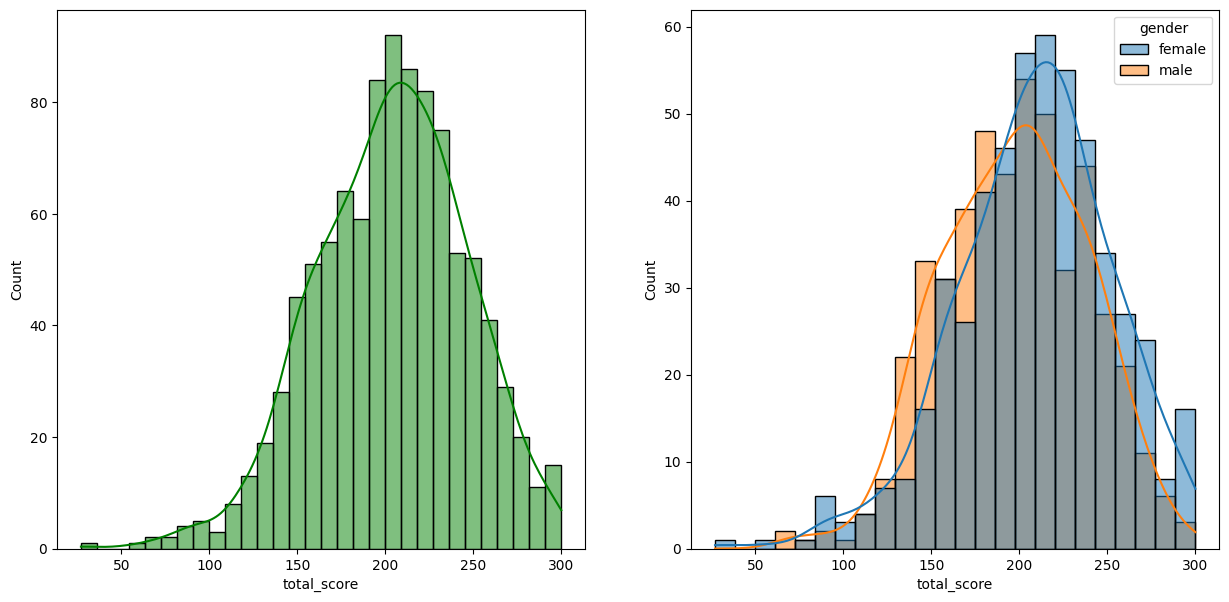

In [110]:
 fig,axs = plt.subplots(1,2,figsize=(15,7))
 plt.subplot(121)
 sns.histplot(data=df, x="total_score", bins=30,kde=True,color='g')
 plt.subplot(122)
 sns.histplot(data=df, x="total_score", kde=True, hue="gender")
 plt.show()

## insights
- Female students tend to perform well then male students.

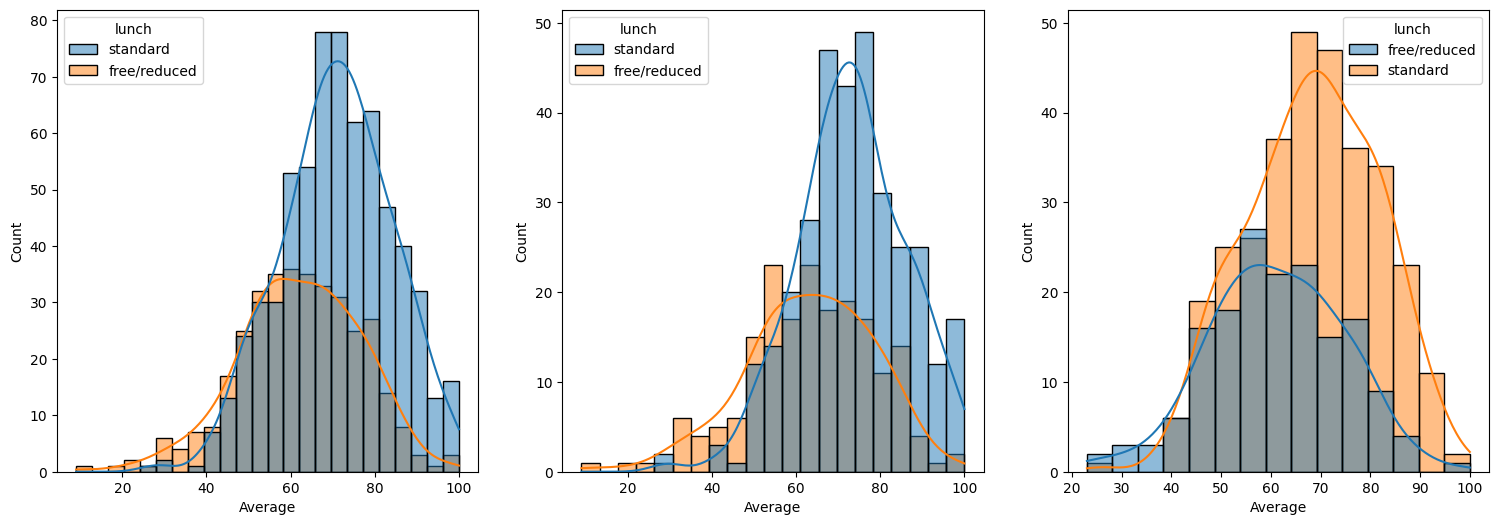

In [111]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='lunch')
plt.show()

## insights

- Standard lunch helps perform well in exams.
- Standard lunch helps both  male and female perform well in exams.

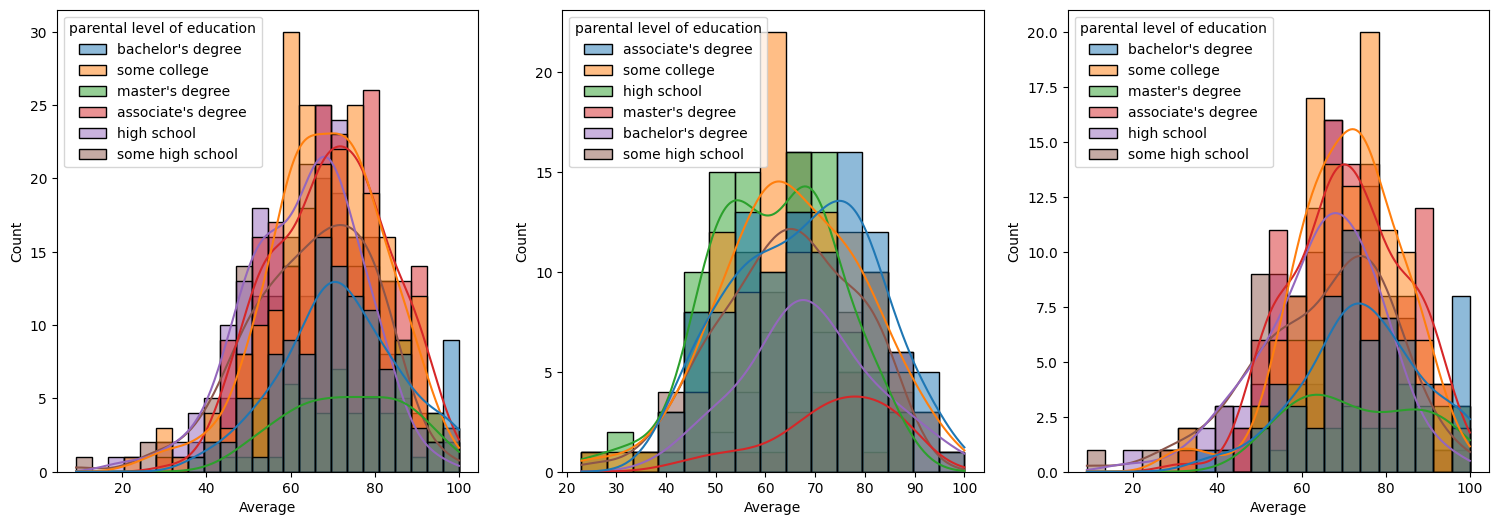

In [112]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='parental level of education')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='parental level of education')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='parental level of education')
plt.show()

## insights
- Parental education doesn't show any impact on student  performance.


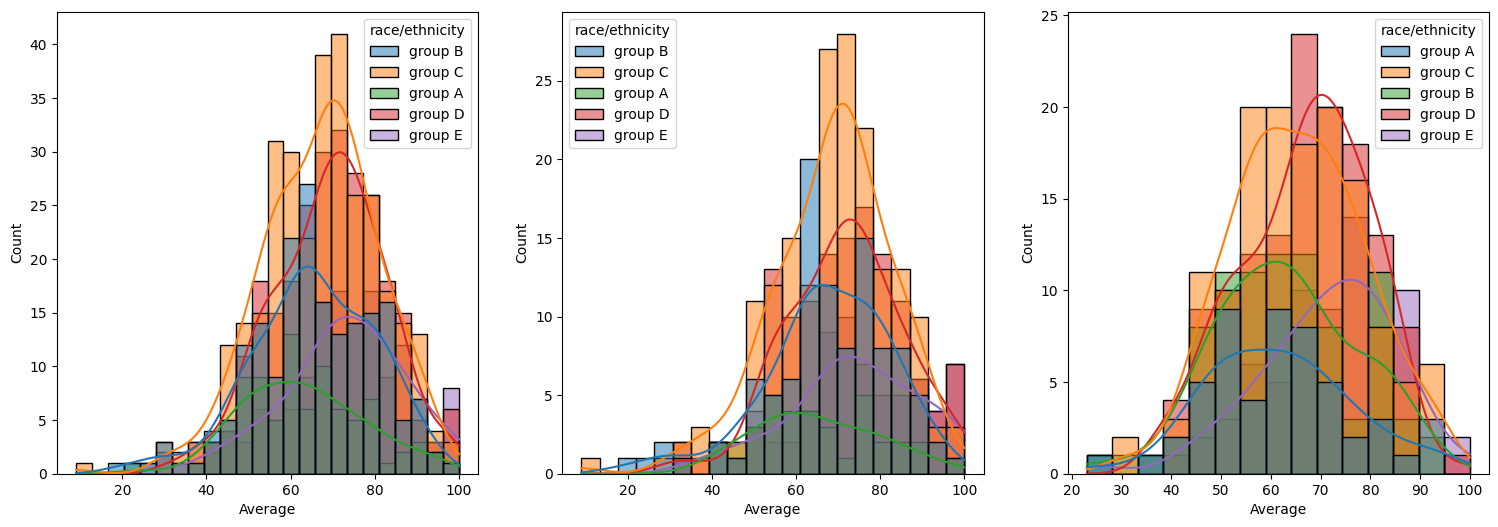

In [113]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax =sns.histplot(data=df,x='Average',kde=True,hue='race/ethnicity')
plt.subplot(142)
ax =sns.histplot(data=df[df.gender=='female'],x='Average',kde=True,hue='race/ethnicity')
plt.subplot(143)
ax =sns.histplot(data=df[df.gender=='male'],x='Average',kde=True,hue='race/ethnicity')
plt.show()

## insights
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

<Axes: title={'center': 'Writing score'}, ylabel='writing score'>

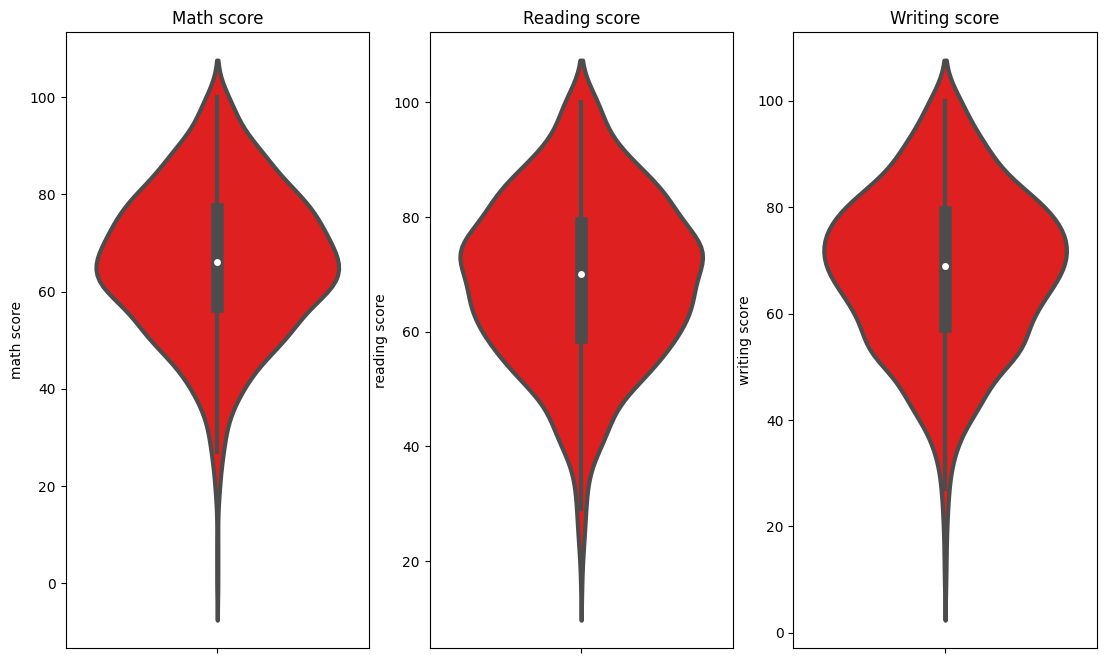

In [114]:
# Maximum score of students in all three subjects.
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math score')
sns.violinplot(y="math score", data=df, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading score')
sns.violinplot(y="reading score", data=df, color='red', linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing score')
sns.violinplot(y="writing score", data=df, color='red', linewidth=3)

## insights
- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

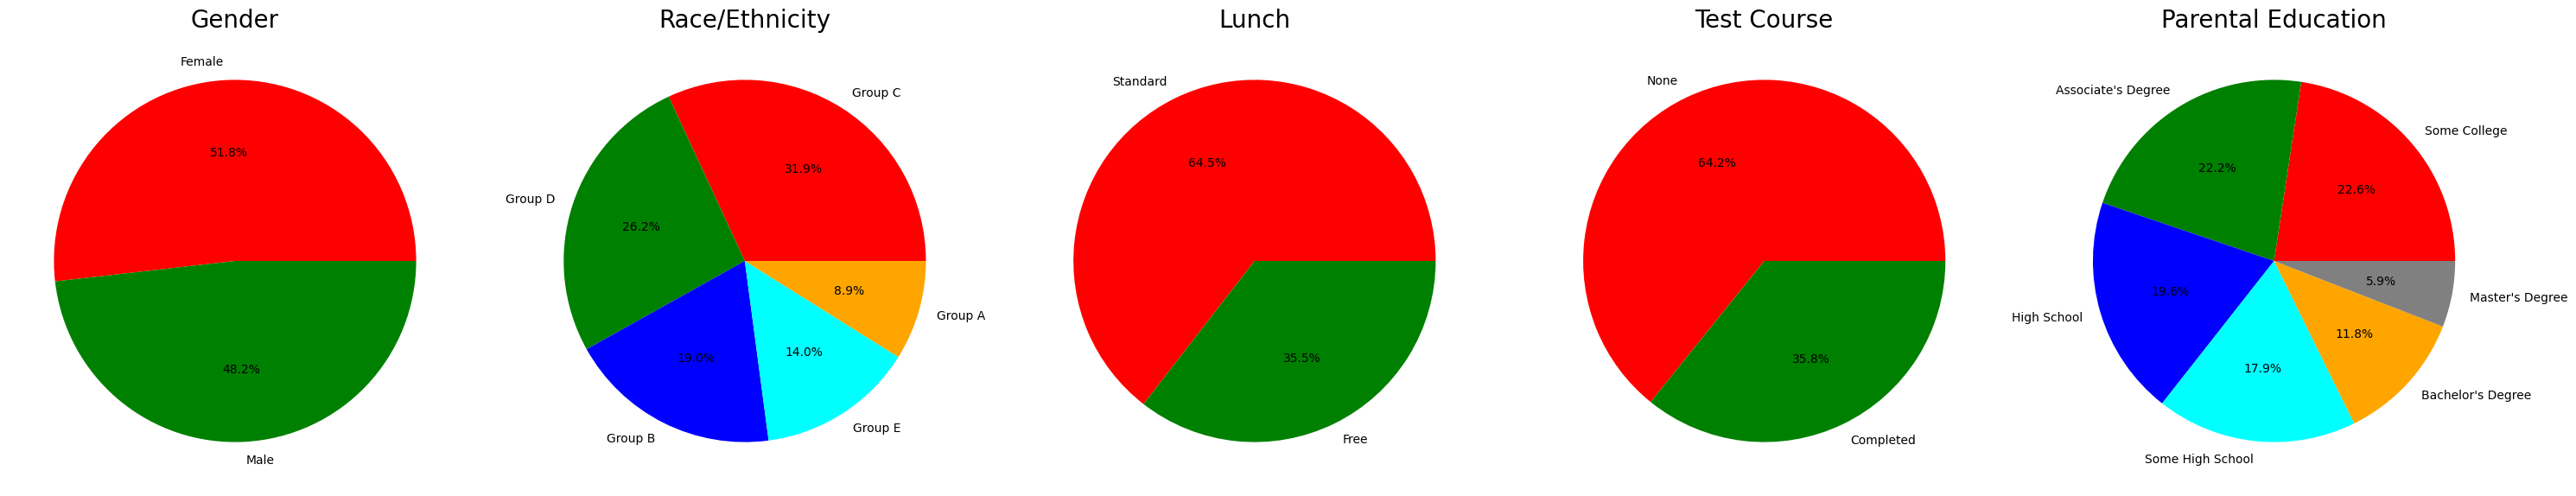

In [115]:
#Multivariate analysis using pieplot
plt.rcParams['figure.figsize'] = (30, 12)
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%1.1f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')

plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '%1.1f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()

plt.show()

## insights
- Number of female students are more compared to Male.
- More no of students are from group "C" followed by Group "D".
- No of students who have standard lunch are more.
- No of student who have not enrolled in any test preparation course is greater.
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

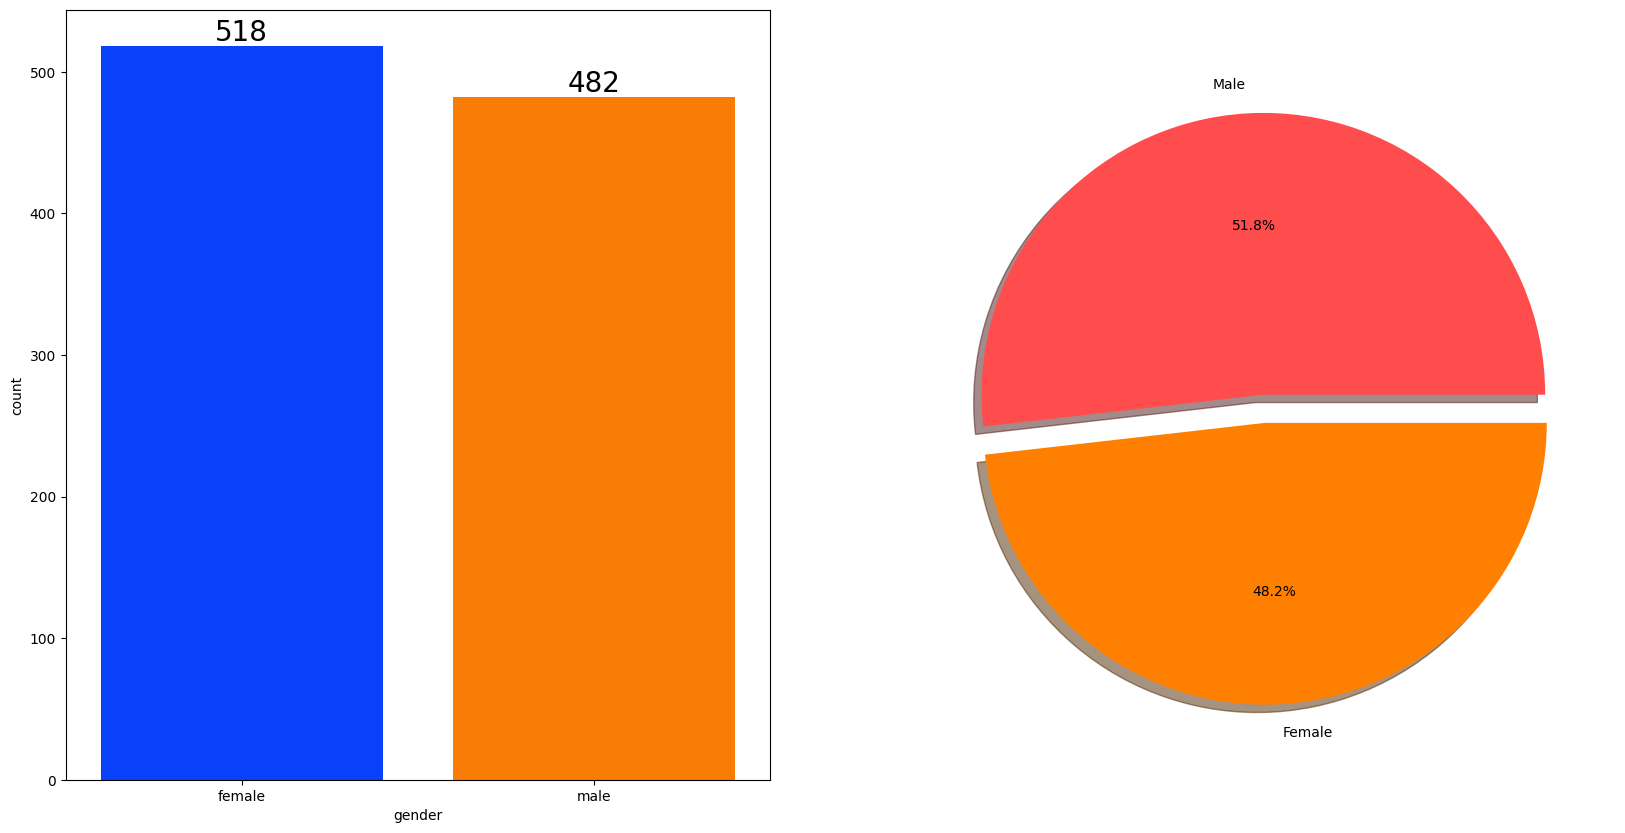

In [116]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],autopct='%1.1f%%',explode=[0,0.1],shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

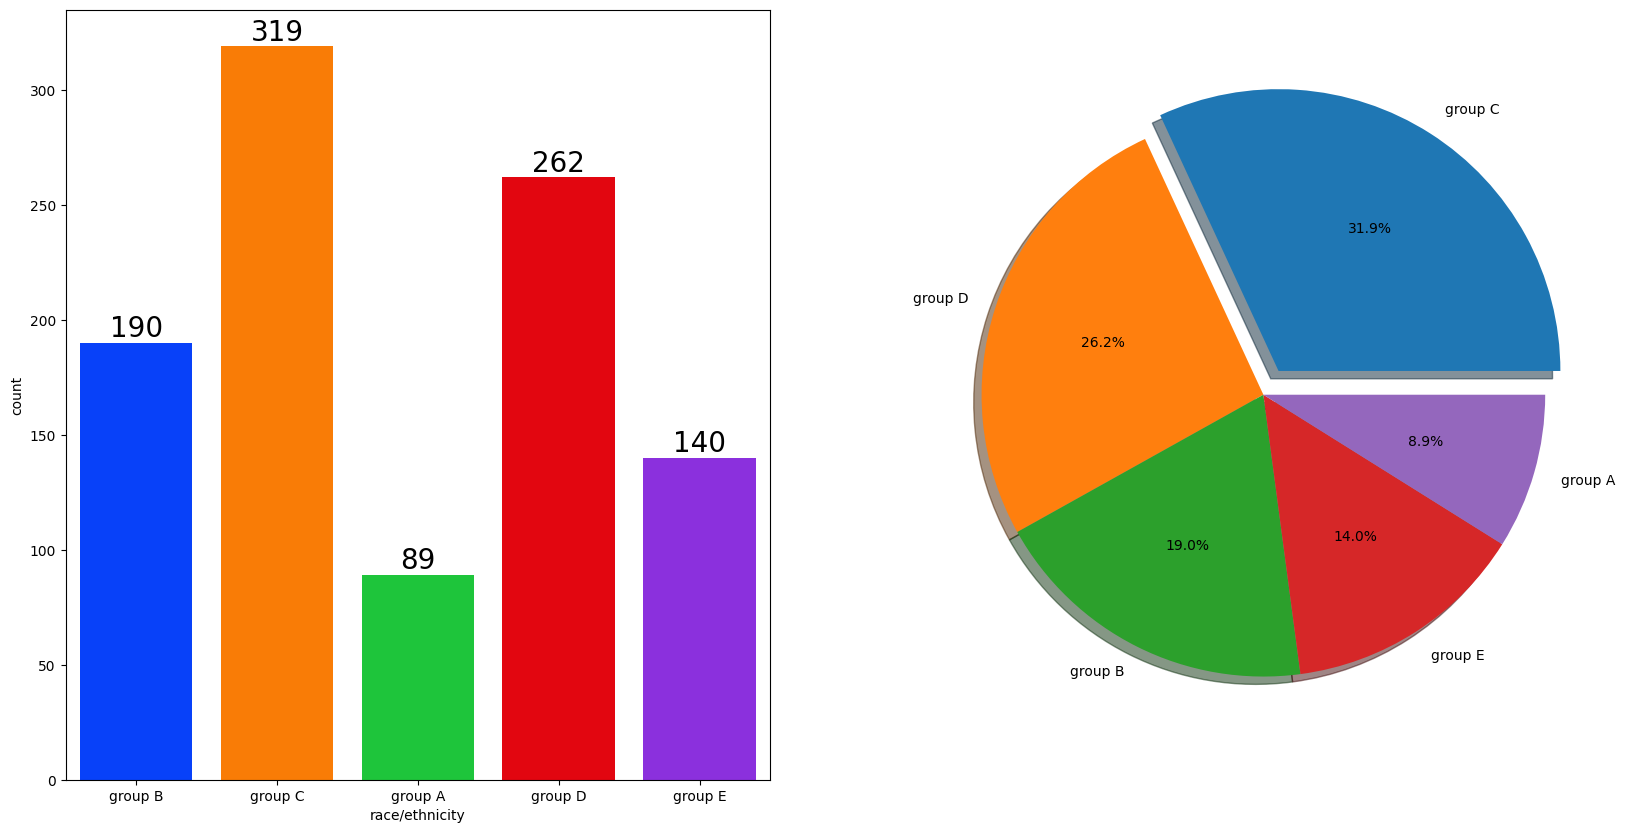

In [119]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race/ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

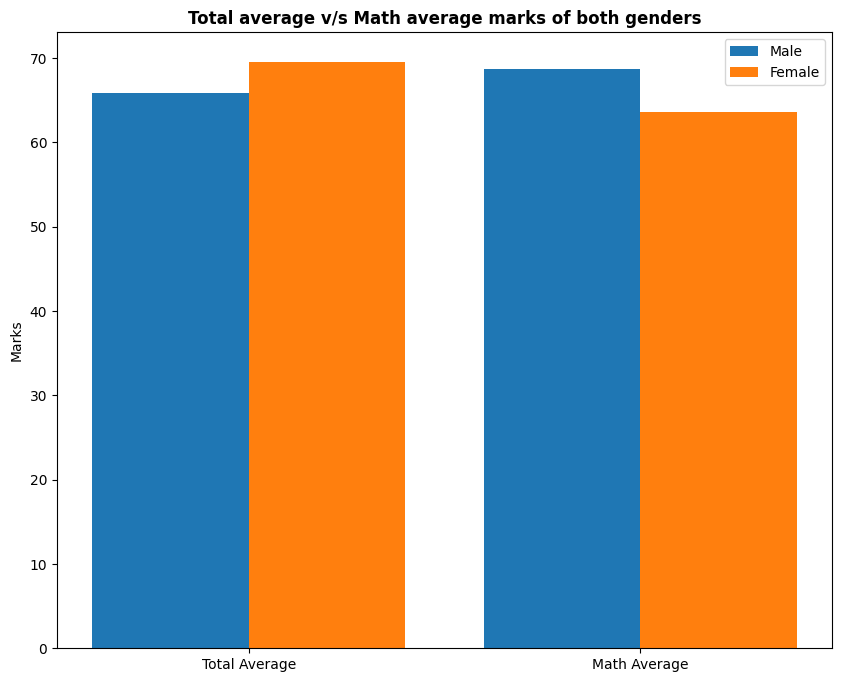

In [136]:
gender_group = df.groupby('gender')
plt.figure(figsize=(10, 8))

X = ['Total Average', 'Math Average']

# Extracting average scores using column names ('Average' and 'math score')
female_scores = [gender_group['Average'].get_group('female').mean(), gender_group['math score'].get_group('female').mean()]
male_scores = [gender_group['Average'].get_group('male').mean(), gender_group['math score'].get_group('male').mean()]
X_axis = np.arange(len(X))
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female')
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total average v/s Math average marks of both genders", fontweight='bold')
plt.legend()
plt.show()





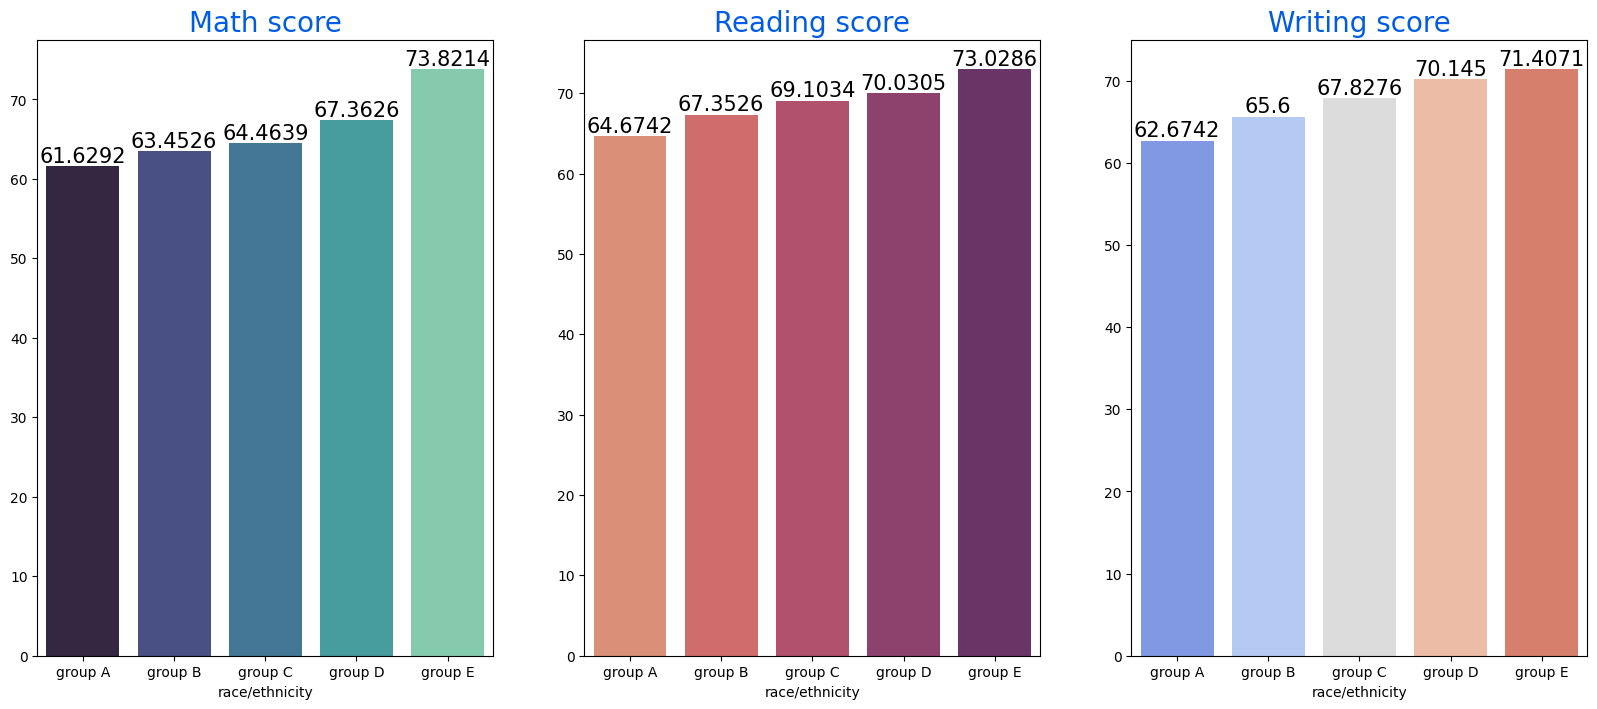

In [120]:
Group_data2=df.groupby('race/ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.barplot(x=Group_data2['math score'].mean().index,y=Group_data2['math score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading score'].mean().index,y=Group_data2['reading score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing score'].mean().index,y=Group_data2['writing score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

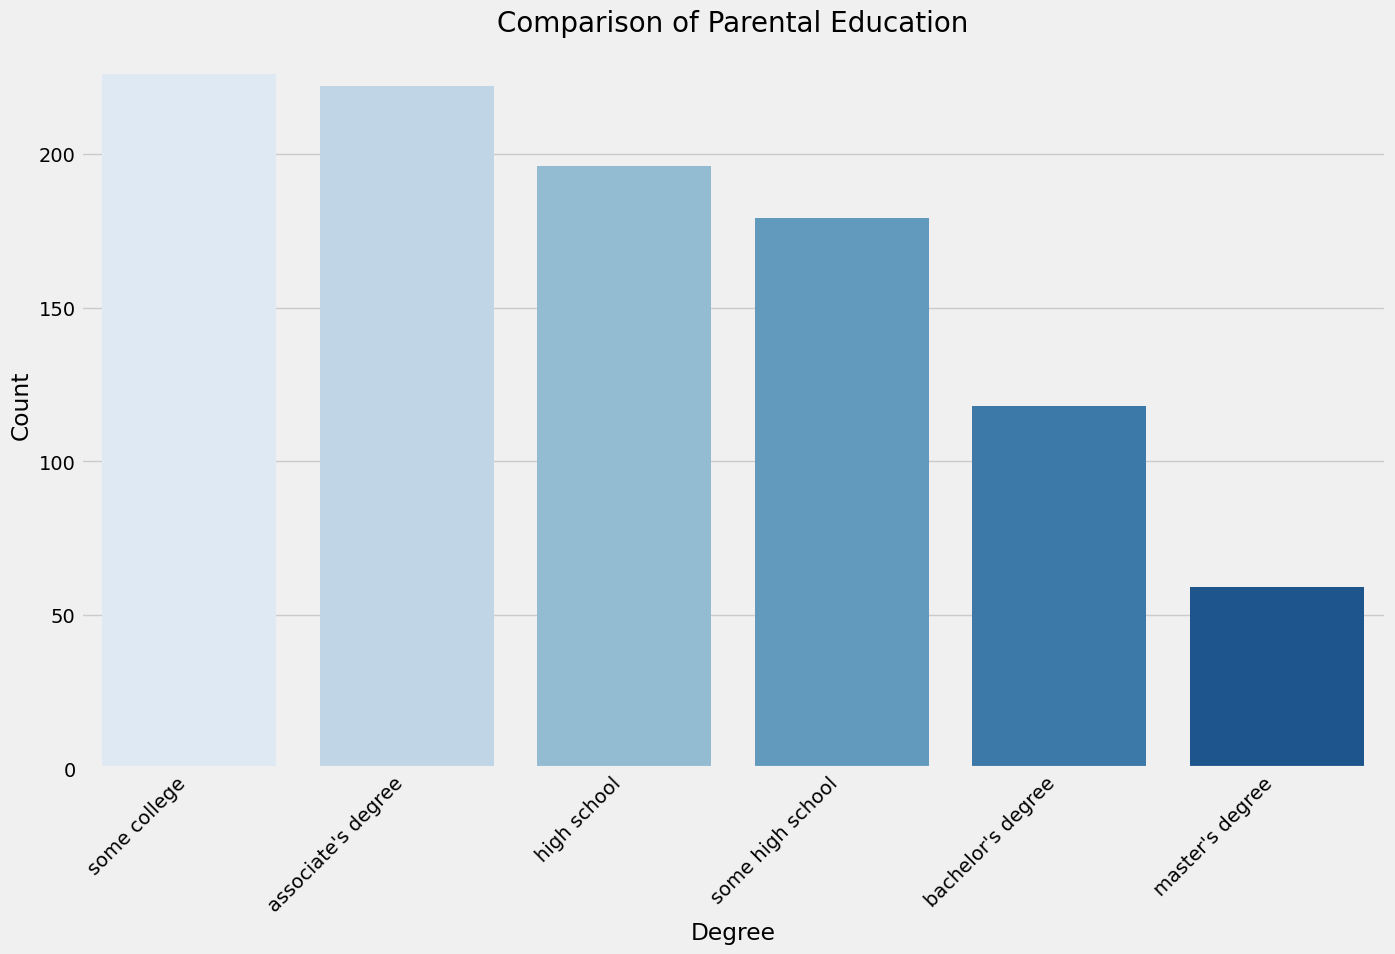

In [139]:
plt.rcParams['figure.figsize'] = (15, 9)

# Use the 'fivethirtyeight' style for the plot
plt.style.use('fivethirtyeight')

# Create a count plot using seaborn, specifying the order of categories
sns.countplot(data=df, x='parental level of education', palette='Blues',
              order=df['parental level of education'].value_counts().index)

# Set the title and axis labels
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Degree')
plt.ylabel('Count')

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.show()

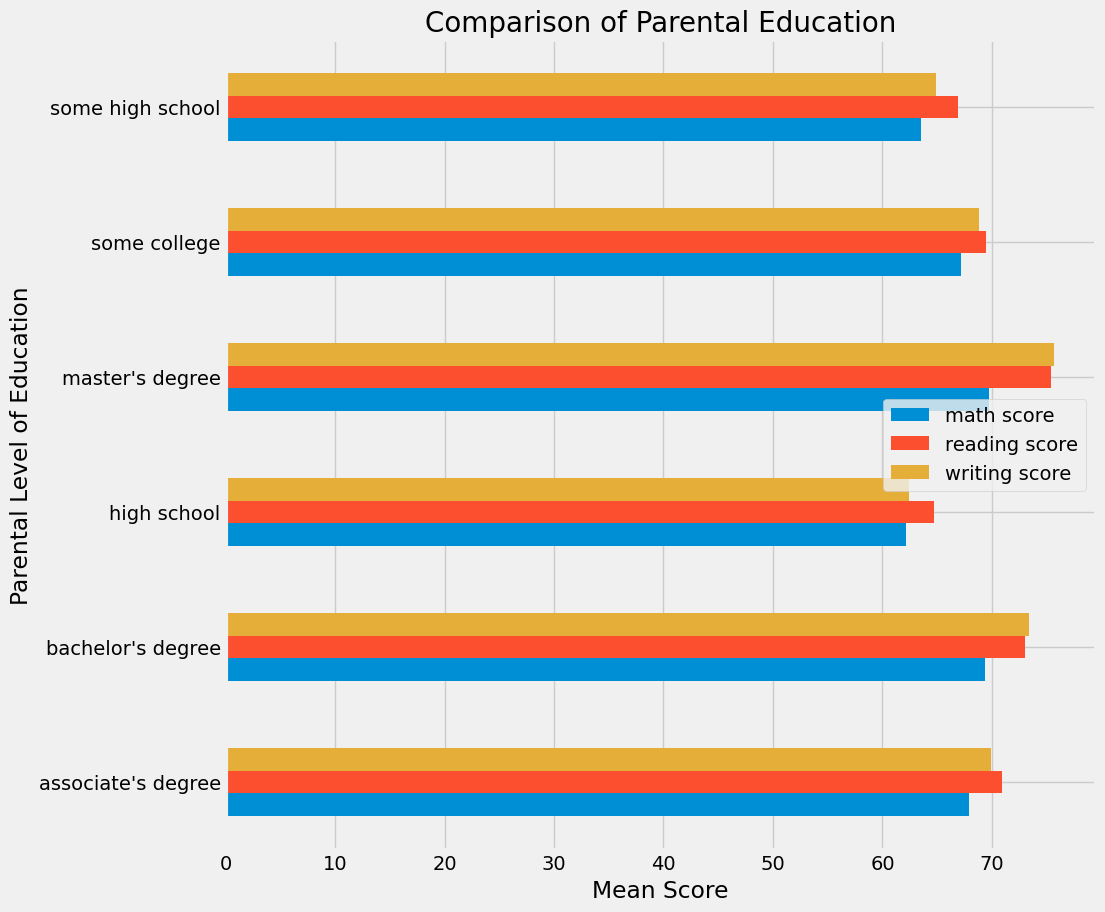

In [144]:
plt.rcParams['figure.figsize'] = (10, 10)

# Group the DataFrame by 'parental level of education' and calculate the mean of 'math score' and 'reading score'
grouped_data = df.groupby('parental level of education')[['math score', 'reading score','writing score']].mean()

# Create a horizontal bar chart using the mean values
grouped_data.plot(kind='barh')

# Set the title and axis labels
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)
plt.xlabel('Mean Score')
plt.ylabel('Parental Level of Education')

# Display the plot
plt.show()

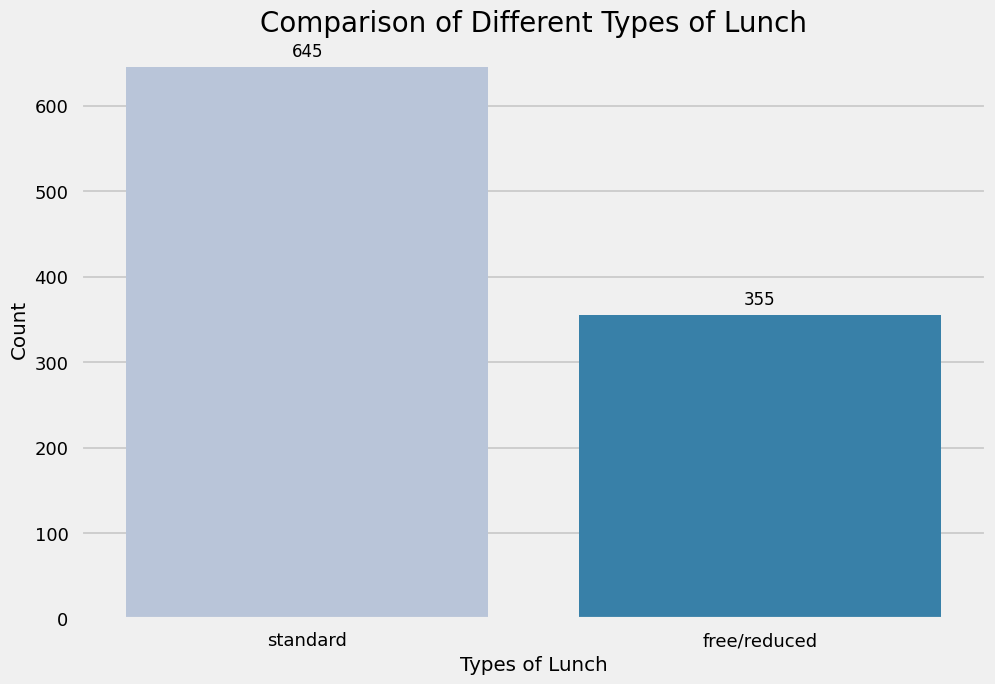

In [165]:
# Set the figure size for the plot
plt.rcParams['figure.figsize'] = (15, 9)

# Use the 'seaborn-talk' style for the plot
plt.style.use('seaborn-talk')

# Create a count plot using seaborn
ax = sns.countplot(x='lunch', data=df, palette='PuBu')

# Set the title and axis labels
plt.title('Comparison of Different Types of Lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of Lunch')
plt.ylabel('Count')

# Add labels to the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, padding=5)

# Display the plot
plt.show()

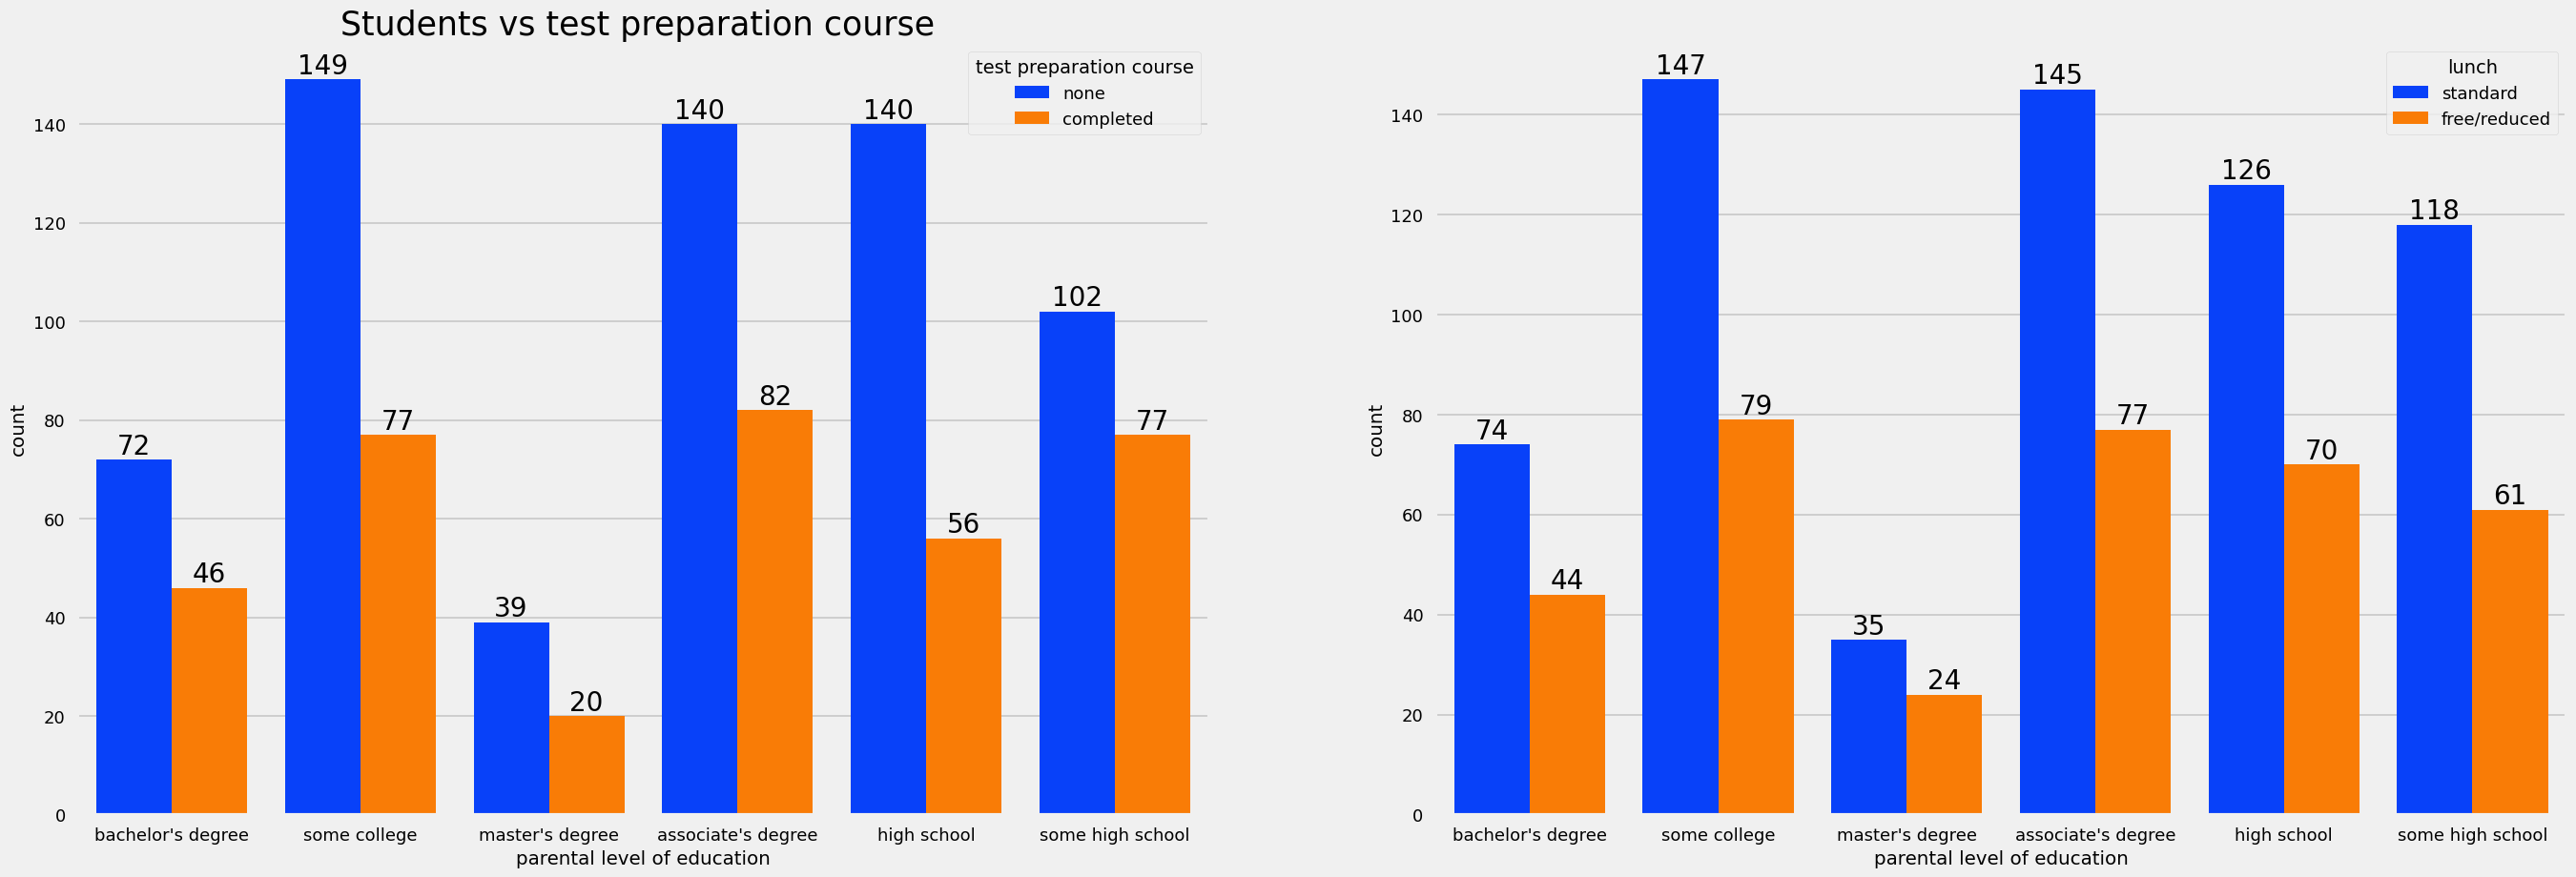

In [168]:
f,ax=plt.subplots(1,2,figsize=(30,10))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20)   


<Axes: xlabel='lunch', ylabel='writing score'>

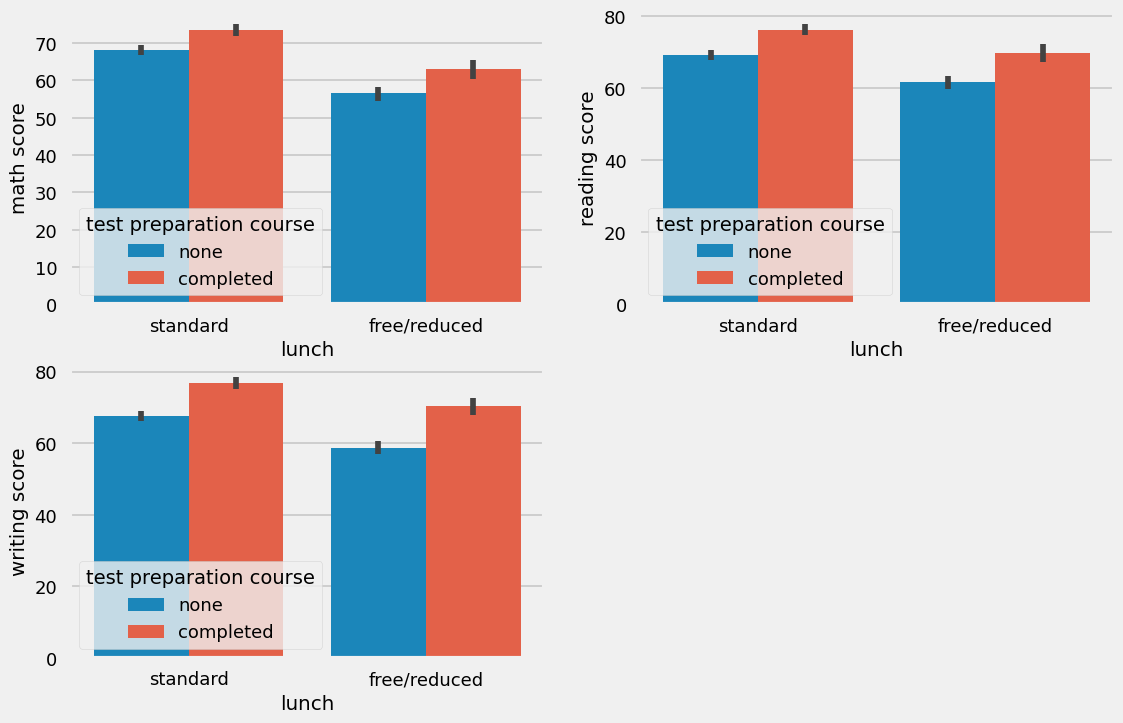

In [171]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

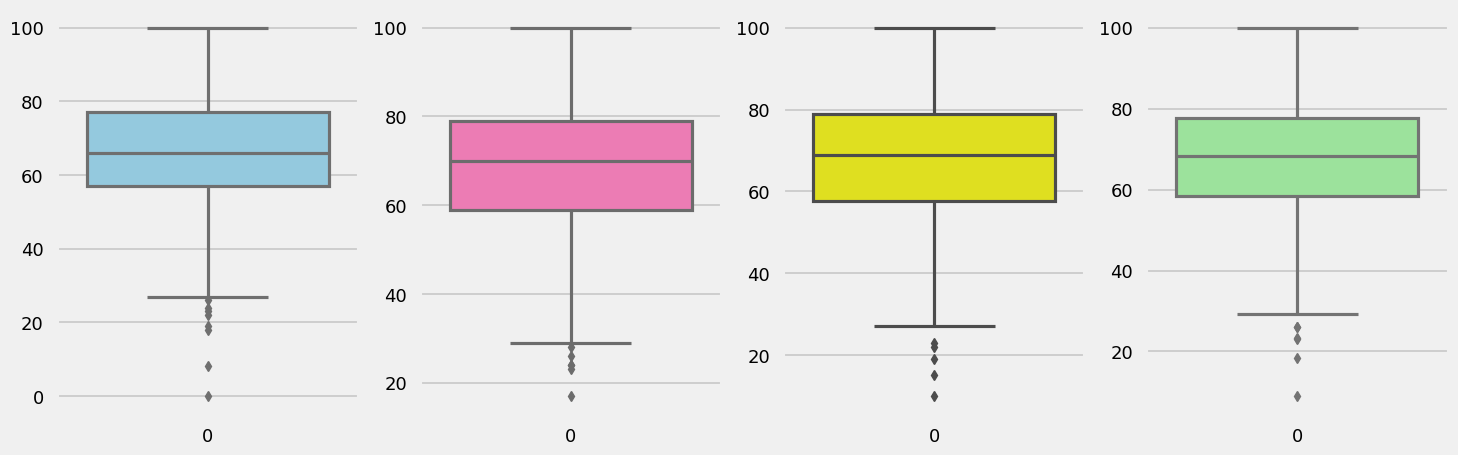

In [173]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['Average'],color='lightgreen')
plt.show()

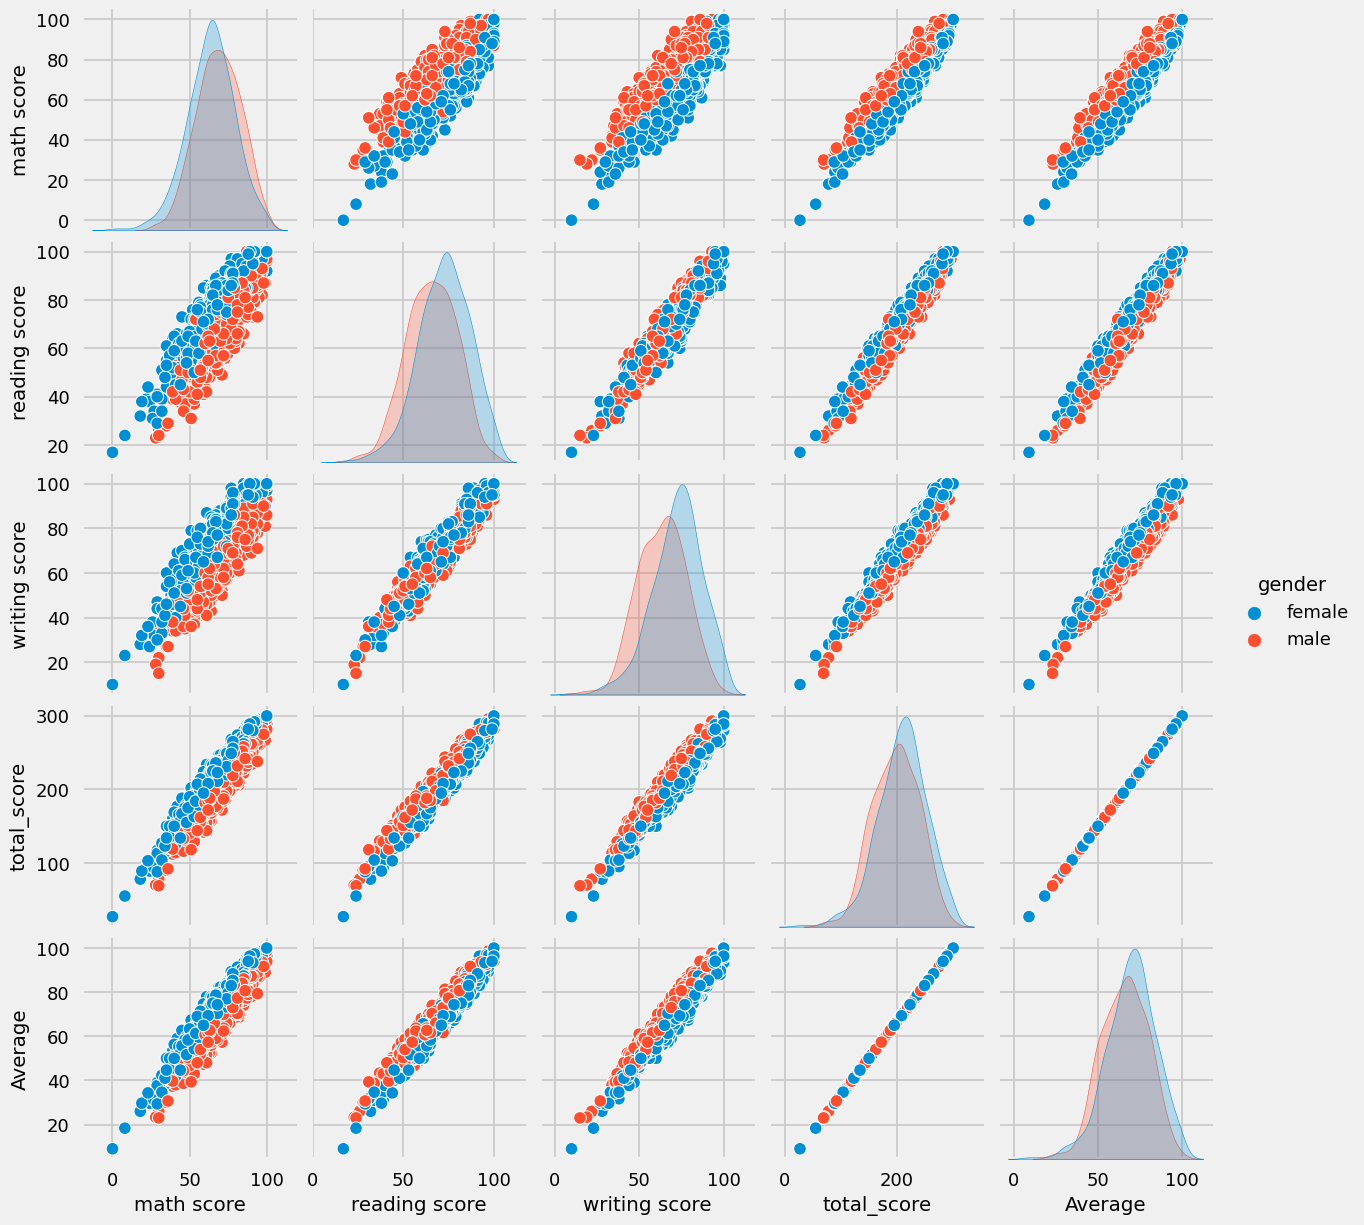

In [176]:
sns.pairplot(df,hue = 'gender')
plt.show()